### Homeworksheet 4 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In these excercises the Numerov algorithm is used to calculate the stationary states of neutrons in the gravitational field of the Earth.

The gravitational potential can be expressed as \begin{equation*}
V(z) = mgz
\end{equation*}

we place a perfectly reflecting mirror at $z=0$, so  we only seek solutions for $z \geq \ 0$.

We now need to properly choose length and energy units to 

$$x(z)=\frac{2m^2gz}{\hbar^2}\\ \epsilon=\frac{2mE}{\hbar^2}$$ 

so the Schrödinger equation with the gravitational Potential

$$\psi''(z)+\frac{2m}{\hbar^2}(E-V(z))\psi(z)=0$$

can be written in the Louisville form  

\begin{equation*}
\psi''(x) + (\epsilon - x) \psi(x) = 0
\end{equation*}

An equation of this shape can be solved using the nuverov algorithm, as discussed in the lecture.

In the following cell, the Numerov algorithm is implemented.  
The function $kb$ is defined so one can easily adapt the numerov algorithm to different potentials.  
(The function numerov could be hard-coded to one specific problem, but in this way it is more flexible, e.g. the problem of the tutorial could be implemented without much efford)

In [22]:
#Calculates each step using numerov method
def numerov_step(psi_minus_1, psi, k_minus_1, k, k_plus_1, h):
    h2 = h ** 2
    a = 2 * (1 - (5 / 12) * (h2) * k) * psi
    b = (1 + (1 / 12) * (h2) * k_minus_1) * psi_minus_1
    c = (1 + (1 / 12) * (h2) * k_plus_1)
    return (a - b) / c

def kb(epsilon, x):
    return epsilon-x

def numerov(a, h, xmax, epsilon):
    #initiate starting values
    x0 = 0
    x_out = [x0]
    psi0 = 0
    psi1 = a 
    psi_out = [psi0, psi1]
    x0 += h
    x_out.append(x0)
    #iterate over intervall
    while x0 <= xmax:
        x0 += h
        #calculate using numerov method
        psin = numerov_step(psi_out[-2], psi_out[-1], kb(epsilon, (x_out[-2])), kb(epsilon, (x_out[-1])), kb(epsilon, (x0)), h)
        #Needed for plotting
        psi_out.append(psin)
        x_out.append(x0)
    #convert into arrays
    x_out = np.array(x_out)
    psi_out = np.array(psi_out)
    return x_out, psi_out



#### Part 1: The behaviour of the obtained solution for large x

In the first part, the differential equation is solved and plotted for two different $\epsilon$, to show the different behaviour of the solution for x approaching infinity.  
The asymptotic behaviour of the solution towards positive or negative infinity is of interest.

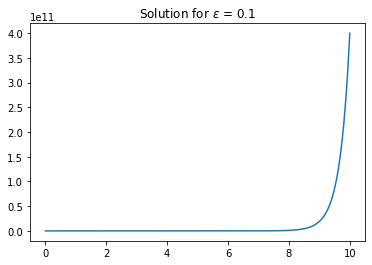

In [23]:
#plot for eps = 0.1
eps=0.1
x_out, psi = numerov(1, 0.001, 10,eps)
plt.title("Solution for $\epsilon$ = %.1f" %(eps))
plt.plot(x_out, psi)

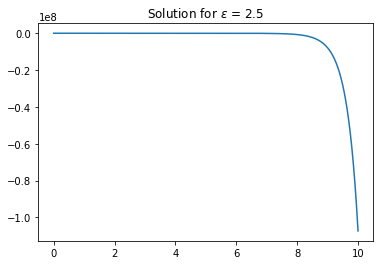

In [24]:
#plot for eps = 2.5
eps=2.5
x_out, psi = numerov(1, 0.001, 10, eps)

plt.title("Solution for $\epsilon$ = %.1f" %(eps))
plt.plot(x_out, psi)


As one can see, $\epsilon$ = 0.1 leads to positive asymptopic behaviour, while $\epsilon$ =2.5 leads to negative asymptopic behaviour.  
This means that neither one of the values for $\epsilon$ is describing our physical wave function.  
(For $\psi$ being a physically possible and reasonable wave function it needs to converge to 0 for $x \rightarrow \infty$.)  
But these values of $\epsilon$ and this change in asymptopic behaviour shows that inbetween these values should be an Eigenvalue and therefore a possible solution.

### Part 2: Calculating the Eigenvalues of the equation

In this part of the excercise, the Eigenvalues of the first three bound states were calculated to two decimals behind the comma, using the properties of the Eigenfunction.  
This can be done by changing $\epsilon_{n}$ from smaller to larger values. $\psi (x)$ does change its sign for $x \rightarrow \infty$.

In [25]:
def find_eigenvalues(steps, stepsize):
    #Stores possible solutions
    poss_sol = []
    #Stores last value of each calculation
    list_last = []
    #calculate for different epsilons
    for i in range(steps):
        x, y = numerov(1, 0.001, 10, i*stepsize)
        list_last.append(y[-1])
    #turn into np.array
    list_last = np.array(list_last)
    #Iterate over every list item
    for n, y in enumerate(list_last):
        #Dont check 1st item, error would be thrown
        if n == 0:
            pass
        #if the last value of the array switches its value from plus to minus,
        # we know one of the values for epsilon must be an eigenvalue 
        elif list_last[n-1] > 0 and list_last[n] < 0:
            #checks which value is closer to zero and appends the one to the solutions list
            if abs(list_last[n-1]) < abs(list_last[n]):
                poss_sol.append((n-1)*stepsize)
            else:
                poss_sol.append(n*stepsize)
        #vice versa for switch form minus to plus
        elif list_last[n-1] < 0 and list_last[n] > 0:
            #same as above
            if abs(list_last[n-1]) < abs(list_last[n]):
                poss_sol.append((n-1)*stepsize)
            else:
                poss_sol.append(n*stepsize)
        #break after 3 solutions are found
        if len(poss_sol) == 3:
            break
        
    return poss_sol


The function to calculate possible eigenvalues in a given range is now used to find the first three values beween 1000 and 1.

In [26]:
poss_sol = find_eigenvalues(1000, 0.01)
for n, solution in enumerate(poss_sol):
    print(f"Eigenvalue {n+1} = {solution:.2f}")

Eigenvalue 1 = 2.34
Eigenvalue 2 = 4.09
Eigenvalue 3 = 5.52


Compared to the values of $\epsilon$ from above, one would expect an Eigenvalue in the range of 0.1 to 2.5.  
Looking at Eigenvalue 1 we get the expected result.

In [30]:
#Calculate all values
x_out_0, psi_0 = numerov(1, 0.1, 8, poss_sol[0])
x_out_1, psi_1 = numerov(1, 0.01, 8, poss_sol[1])
x_out_2, psi_2 = numerov(1, 0.01, 8, poss_sol[2])


#The following is needed to cut off the plot, so it looks nice
for n, y in enumerate(psi_0):
    #Looks, when psi == 0, then cuts off the array
    if y < 0 and n>5:
        psi_0 = psi_0[:n]
        x_out_0 = x_out_0[:n]
        break

for n, y in enumerate(psi_1):
    #Looks, when psi_1 is greater than 0 and psi_0 is smaller than 0
    #then cuts off the array
    if y > 0 and psi_1[n-1] < 0:
        psi_1 = psi_1[:n]
        x_out_1 = x_out_1[:n]
        break


for n, y in enumerate(psi_2):
    counter = 0
    if y > 0 and n<1:
        #Looks, when psi == 0, for the third time, then cuts off the array
        if counter == 2:
            psi_2 = psi_2[:n]
            x_out_2 = x_out_2[:n]
            break
        counter +=1

solutions_psi = [psi_0, psi_1, psi_2]
solutions_x = [x_out_0, x_out_1, x_out_2]

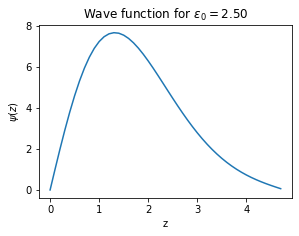

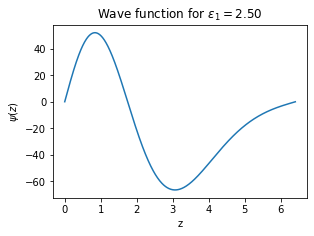

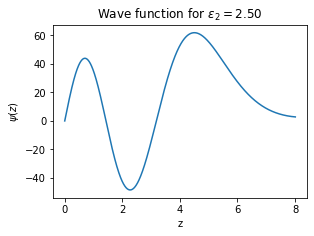

In [31]:
for n, solution in enumerate(solutions_psi):
    fig = plt.figure(figsize=(10,7))
    ax=plt.subplot(2,2,n+1)
    ax.plot(solutions_x[n], solution)
    ax.set_title("Wave function for $\epsilon_{}={:.2f}$".format(n,eps))
    ax.set_xlabel("z")
    ax.set_ylabel("$\psi(z)$")

One can see that the Eigenfunction gets more local extrema for increasing n. This is what one would expect for particles in a potential.